<a href="https://colab.research.google.com/github/sweetiepickle/AI-20-03-23---ANN/blob/main/AI_20_03_23_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# artificial neuron network
# tín hiệu ra perceptron là binary
# hyper parameter : tham số bậc cao
# bios : tham số bù , tín hiệu vào luôn là 1
# tín hiệu ra đi vào hàm truyền sigmoid
# perceptron là mảng 1 lớp (đơn bào)
# mảng nhiều lớp : có hidden layers => 1 mạng thần kinh
# mỗi lớp đều có hệ số bù bios
# mỗi lần train có 1 kết quả khác nhau ,  độ chính xác khác nhau

In [2]:
#mô hình perceptron
from sklearn.linear_model import Perceptron
x= [[0,0],[0,1],[1,0],[1,1]]
t= [0,1,1,1]

In [3]:
model= Perceptron()
model.fit(x,t)
model.score(x,t)

1.0

In [4]:
x1= [[0.5,0.5],[-0.5,-0.5],[10,2.3],[-1,-20]]
y1= model.predict(x1)
print(y1)
model.score(x1,y1)

[1 0 1 0]


1.0

In [5]:
x2= [[-0.5,-0.5],[-0.5,0.5],[0.5,-0.5],[-0.1,1]]
t2= [1,1,0,0]
model= Perceptron()
model.fit(x2,t2)
model.score(x2,t2)

1.0

In [6]:
x1= [[0.5,0.5],[-0.5,-0.5],[10,2.3],[-1,-20]]
y1= model.predict(x1)
print(y1)
model.score(x1,y1)

[0 1 0 1]


1.0

In [7]:
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split

# dữ liệu để test ko dùng để train và ngược lại
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
iris= datasets.load_iris()
x= iris.data
y= iris.target
print(x[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3)
sc= StandardScaler()
sc.fit(x_train)
x_train_std= sc.transform(x_train)
x_test_std= sc.transform(x_test)
print(x_train_std[:5], x_train[:5])
print(y[:5])

[[-1.06127082 -2.76851722 -0.15921861 -0.28666126]
 [ 2.20905829 -0.12824194  1.33963248  1.44472202]
 [ 0.99782528 -0.12824194  0.82079941  1.44472202]
 [ 0.27108548 -0.12824194  0.64785505  0.77880537]
 [-1.90913393 -0.12824194 -1.54277347 -1.48531122]] [[5.  2.  3.5 1. ]
 [7.7 3.  6.1 2.3]
 [6.7 3.  5.2 2.3]
 [6.1 3.  4.9 1.8]
 [4.3 3.  1.1 0.1]]
[0 0 0 0 0]


In [9]:
model= Perceptron(max_iter= 1000, eta0= 0.8, random_state= 0)
#model= Perceptron(max_iter= 40, eta0= 0.1, random_state= 0) 
# max iter = epoch : số lần học
# eta0 : tốc độ học ~(0,1)
# random_state : trạng thái lấy giá trị ngẫu nhiên

model.fit(x_train_std, y_train)
y_pred= model.predict(x_test_std)
print(y_pred)
print(y_test)
print('Độ chính xác mô hình: ', accuracy_score(y_test,y_pred))

[0 1 1 2 1 2 0 2 2 0 0 1 2 2 0 2 1 1 0 1 0 2 2 1 1 0 1 2 0 0 1 0 1 1 0 1 1
 2 0 0 2 1 1 0 0]
[0 1 1 2 1 2 0 2 2 0 0 1 2 2 0 2 1 1 0 1 0 2 2 1 2 0 0 2 0 0 1 0 1 2 0 2 1
 2 0 1 2 1 1 0 0]
Độ chính xác mô hình:  0.8888888888888888


crabs

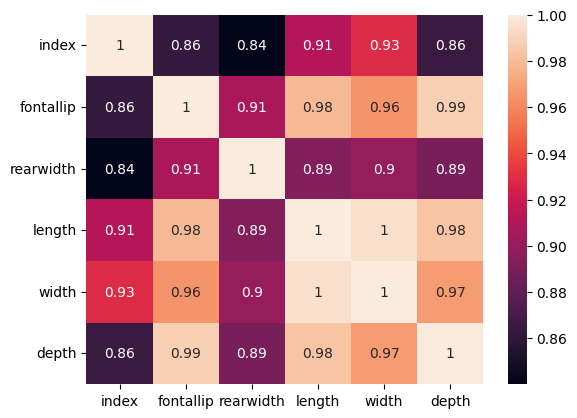

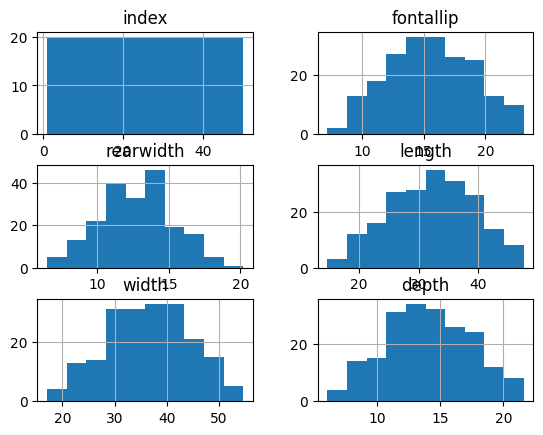

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'crabs.csv'
data= pd.read_csv(url)

import seaborn as sns
sns.heatmap(data.corr(), annot= True)   
data.hist()
plt.show()
data.head()

In [12]:
data['sex']= data['sex'].replace('M','1')
data['sex']= data['sex'].replace('F','0')
data['speies']= data['speies'].replace('O','0')
data['speies']= data['speies'].replace('B','1')

data

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,1,1,1,8.1,6.7,16.1,19.0,7.0
1,1,1,2,8.8,7.7,18.1,20.8,7.4
2,1,1,3,9.2,7.8,19.0,22.4,7.7
3,1,1,4,9.6,7.9,20.1,23.1,8.2
4,1,1,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,0,0,46,21.4,18.0,41.2,46.2,18.7
196,0,0,47,21.7,17.1,41.7,47.2,19.6
197,0,0,48,21.9,17.2,42.6,47.4,19.5
198,0,0,49,22.5,17.2,43.0,48.7,19.8


In [13]:
# chuyển giá trị cột thành list
x= data["speies"].values.tolist()
y= data["sex"].values.tolist()
print('speies: ',x)
print('Số phần tử speies: ',len(x))

print('sex: ',y)
print('Số phần tử sex: ',len(y))

speies:  ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

In [41]:
# dự đoán đầu ra là sex dựa vào các thông số khác
output= pd.Series(data.sex).tolist()
print('Output Data: ', output)

Output Data:  ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

In [72]:
# when the input array is too big and multidimensional or we just don’t know the total elements in the input array.
# But we want to convert that to a 1D array. In such scenarios we can pass the size as -1
input = data.drop('sex', axis= 1).values.reshape( data.shape[0], 7)
print('Input Data: \n', input)

Input Data: 
 [['1' 1 8.1 ... 16.1 19.0 7.0]
 ['1' 2 8.8 ... 18.1 20.8 7.4]
 ['1' 3 9.2 ... 19.0 22.4 7.7]
 ...
 ['0' 48 21.9 ... 42.6 47.4 19.5]
 ['0' 49 22.5 ... 43.0 48.7 19.8]
 ['0' 50 23.1 ... 46.2 52.5 21.1]]


In [76]:
#model= Perceptron(max_iter= 300, eta0= 0.8, random_state= 0)
model.fit(input,output)
print('Accuracy: ' , model.score(input,output))

Accuracy:  0.58
